# Thyroid Disease Data
**Patient demographics & blood test results along with Thyroid disease diagnostic**

#### About Dataset
This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.

#### Source
The data was procured from thyroid disease datasets provided by the UCI Machine Learning Repository.

#### Content
The size for the file featured within this Kaggle dataset is shown below — along with a list of attributes, and their description summaries:

1. Age: The age of the patient at the time of diagnosis or treatment.
2. Gender: The gender of the patient (male or female).
3. Smoking: Whether the patient is a smoker or not.
4. Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).
5. Hx Radiotherapy: History of radiotherapy treatment for any condition.
6. Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.
7. Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
8. Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.
9. Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.
10. Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).
11. Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.
12. T: Tumor classification based on its size and extent of invasion into nearby structures.
13. N: Nodal classification indicating the involvement of lymph nodes.
14. M: Metastasis classification indicating the presence or absence of distant metastases.
15. Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.
16. Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.
17. Recurred: Indicates whether the cancer has recurred after initial treatment.

### Step-1: Load the Dataset

#### 1.1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### 1.2. Load Dataset

In [2]:
df=pd.read_csv('G:/!DataScience/Files/1.Thyroid/Thyroid_Diff.csv/')

In [3]:
df.head()

Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0     I      Excellent       No  
2  T1a  N0  M0     I      Excellent       No  
3  T1a  N0  M0     I      Excellent       No  
4  T1a  N0  M0     I      Excellent       No

### Step 2: Data Preprocessing
#### 2.1 Handle Missing Values

In [4]:
# Check for missing values
df.isnull().sum()

# Fill or drop missing values as appropriate
df.fillna(method='ffill', inplace=True)

#### 2.2 Convert Categorical Columns to Numerical

In [5]:
# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Smoking'] = le.fit_transform(df['Smoking'])
df['Hx Smoking'] = le.fit_transform(df['Hx Smoking'])
df['Hx Radiothreapy'] = le.fit_transform(df['Hx Radiothreapy'])
df['Thyroid Function'] = le.fit_transform(df['Thyroid Function'])
df['Physical Examination'] = le.fit_transform(df['Physical Examination'])
df['Adenopathy'] = le.fit_transform(df['Adenopathy'])
df['Pathology'] = le.fit_transform(df['Pathology'])
df['Focality'] = le.fit_transform(df['Focality'])
df['Risk'] = le.fit_transform(df['Risk'])
df['Stage'] = le.fit_transform(df['Stage'])
df['Response'] = le.fit_transform(df['Response'])
df['Recurred'] = le.fit_transform(df['Recurred'])

In [6]:
# Define a mapping for TNM values if needed
tnm_mapping = {
    'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4,
    'N0': 0, 'N1': 1, 'N2': 2, 'N3': 3,
    'M0': 0, 'M1': 1
}

df['T'] = df['T'].map(tnm_mapping)
df['N'] = df['N'].map(tnm_mapping)
df['M'] = df['M'].map(tnm_mapping)

# Check for any unmapped values
print(df[['T', 'N', 'M']].isnull().sum())

T    232
N    115
M      0
dtype: int64


#### 2.3 Feature Selection

In [7]:
# Define features and target variable
X = df.drop(['Recurred'], axis=1)
y = df['Recurred']

#### 2.4 Train-Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2.5 Feature Scaling

In [9]:
# Extract only numerical columns for scaling
numerical_cols = X_train.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

### Step 3: Exploratory Data Analysis (EDA)
#### 3.1 Visualize the Distribution of Age

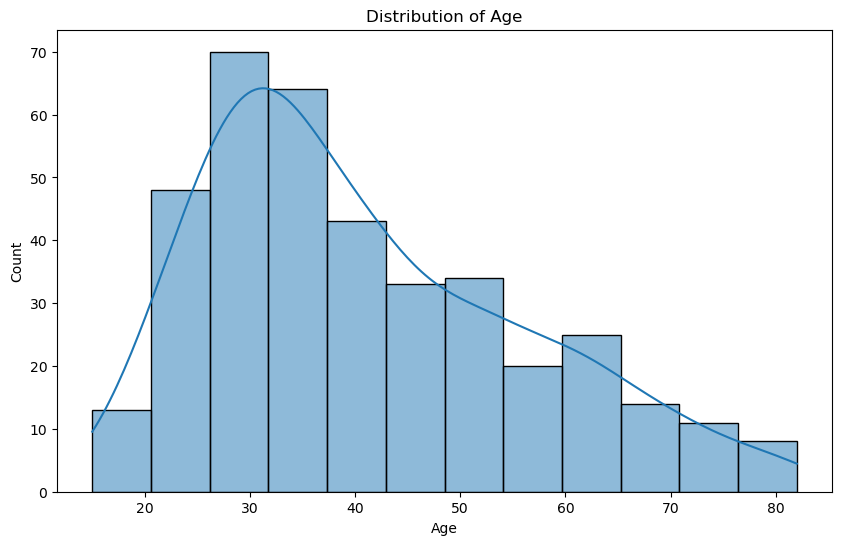

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

#### 3.2 Correlation Heatmap

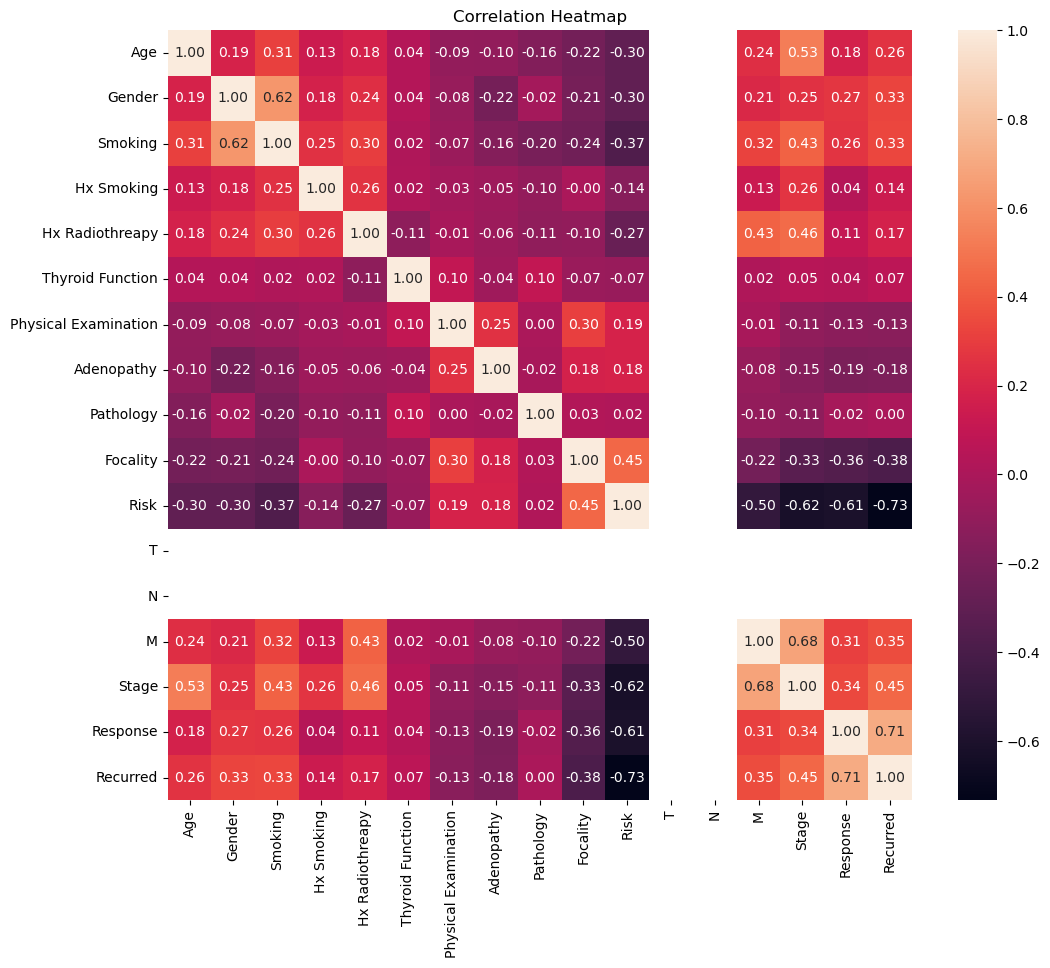

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### 3.3 Gender Distribution

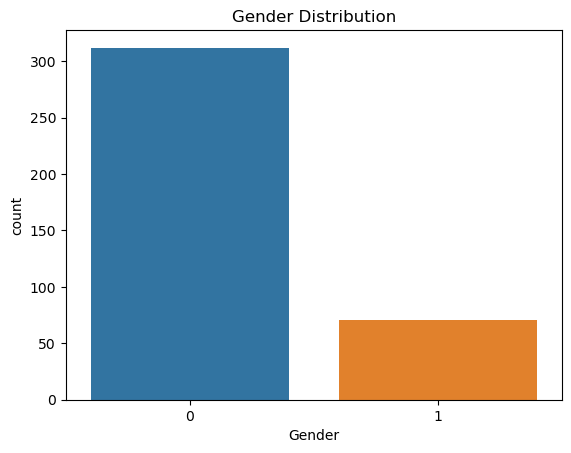

In [12]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

#### 3.4 Smoking Status Distribution

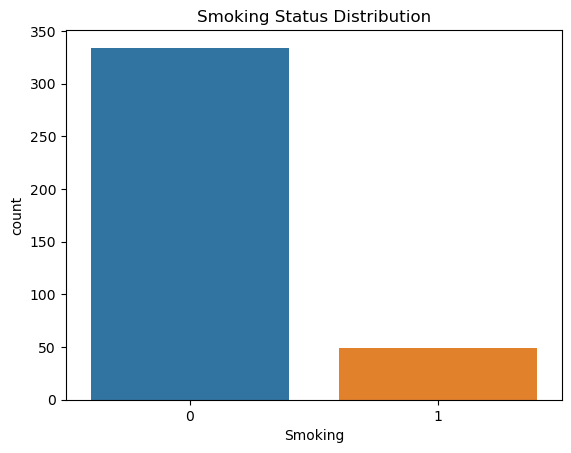

In [13]:
sns.countplot(x='Smoking', data=df)
plt.title('Smoking Status Distribution')
plt.show()

#### 3.5 Pairplot
Pairplots can show the relationships between multiple pairs of features and the distribution of each feature.

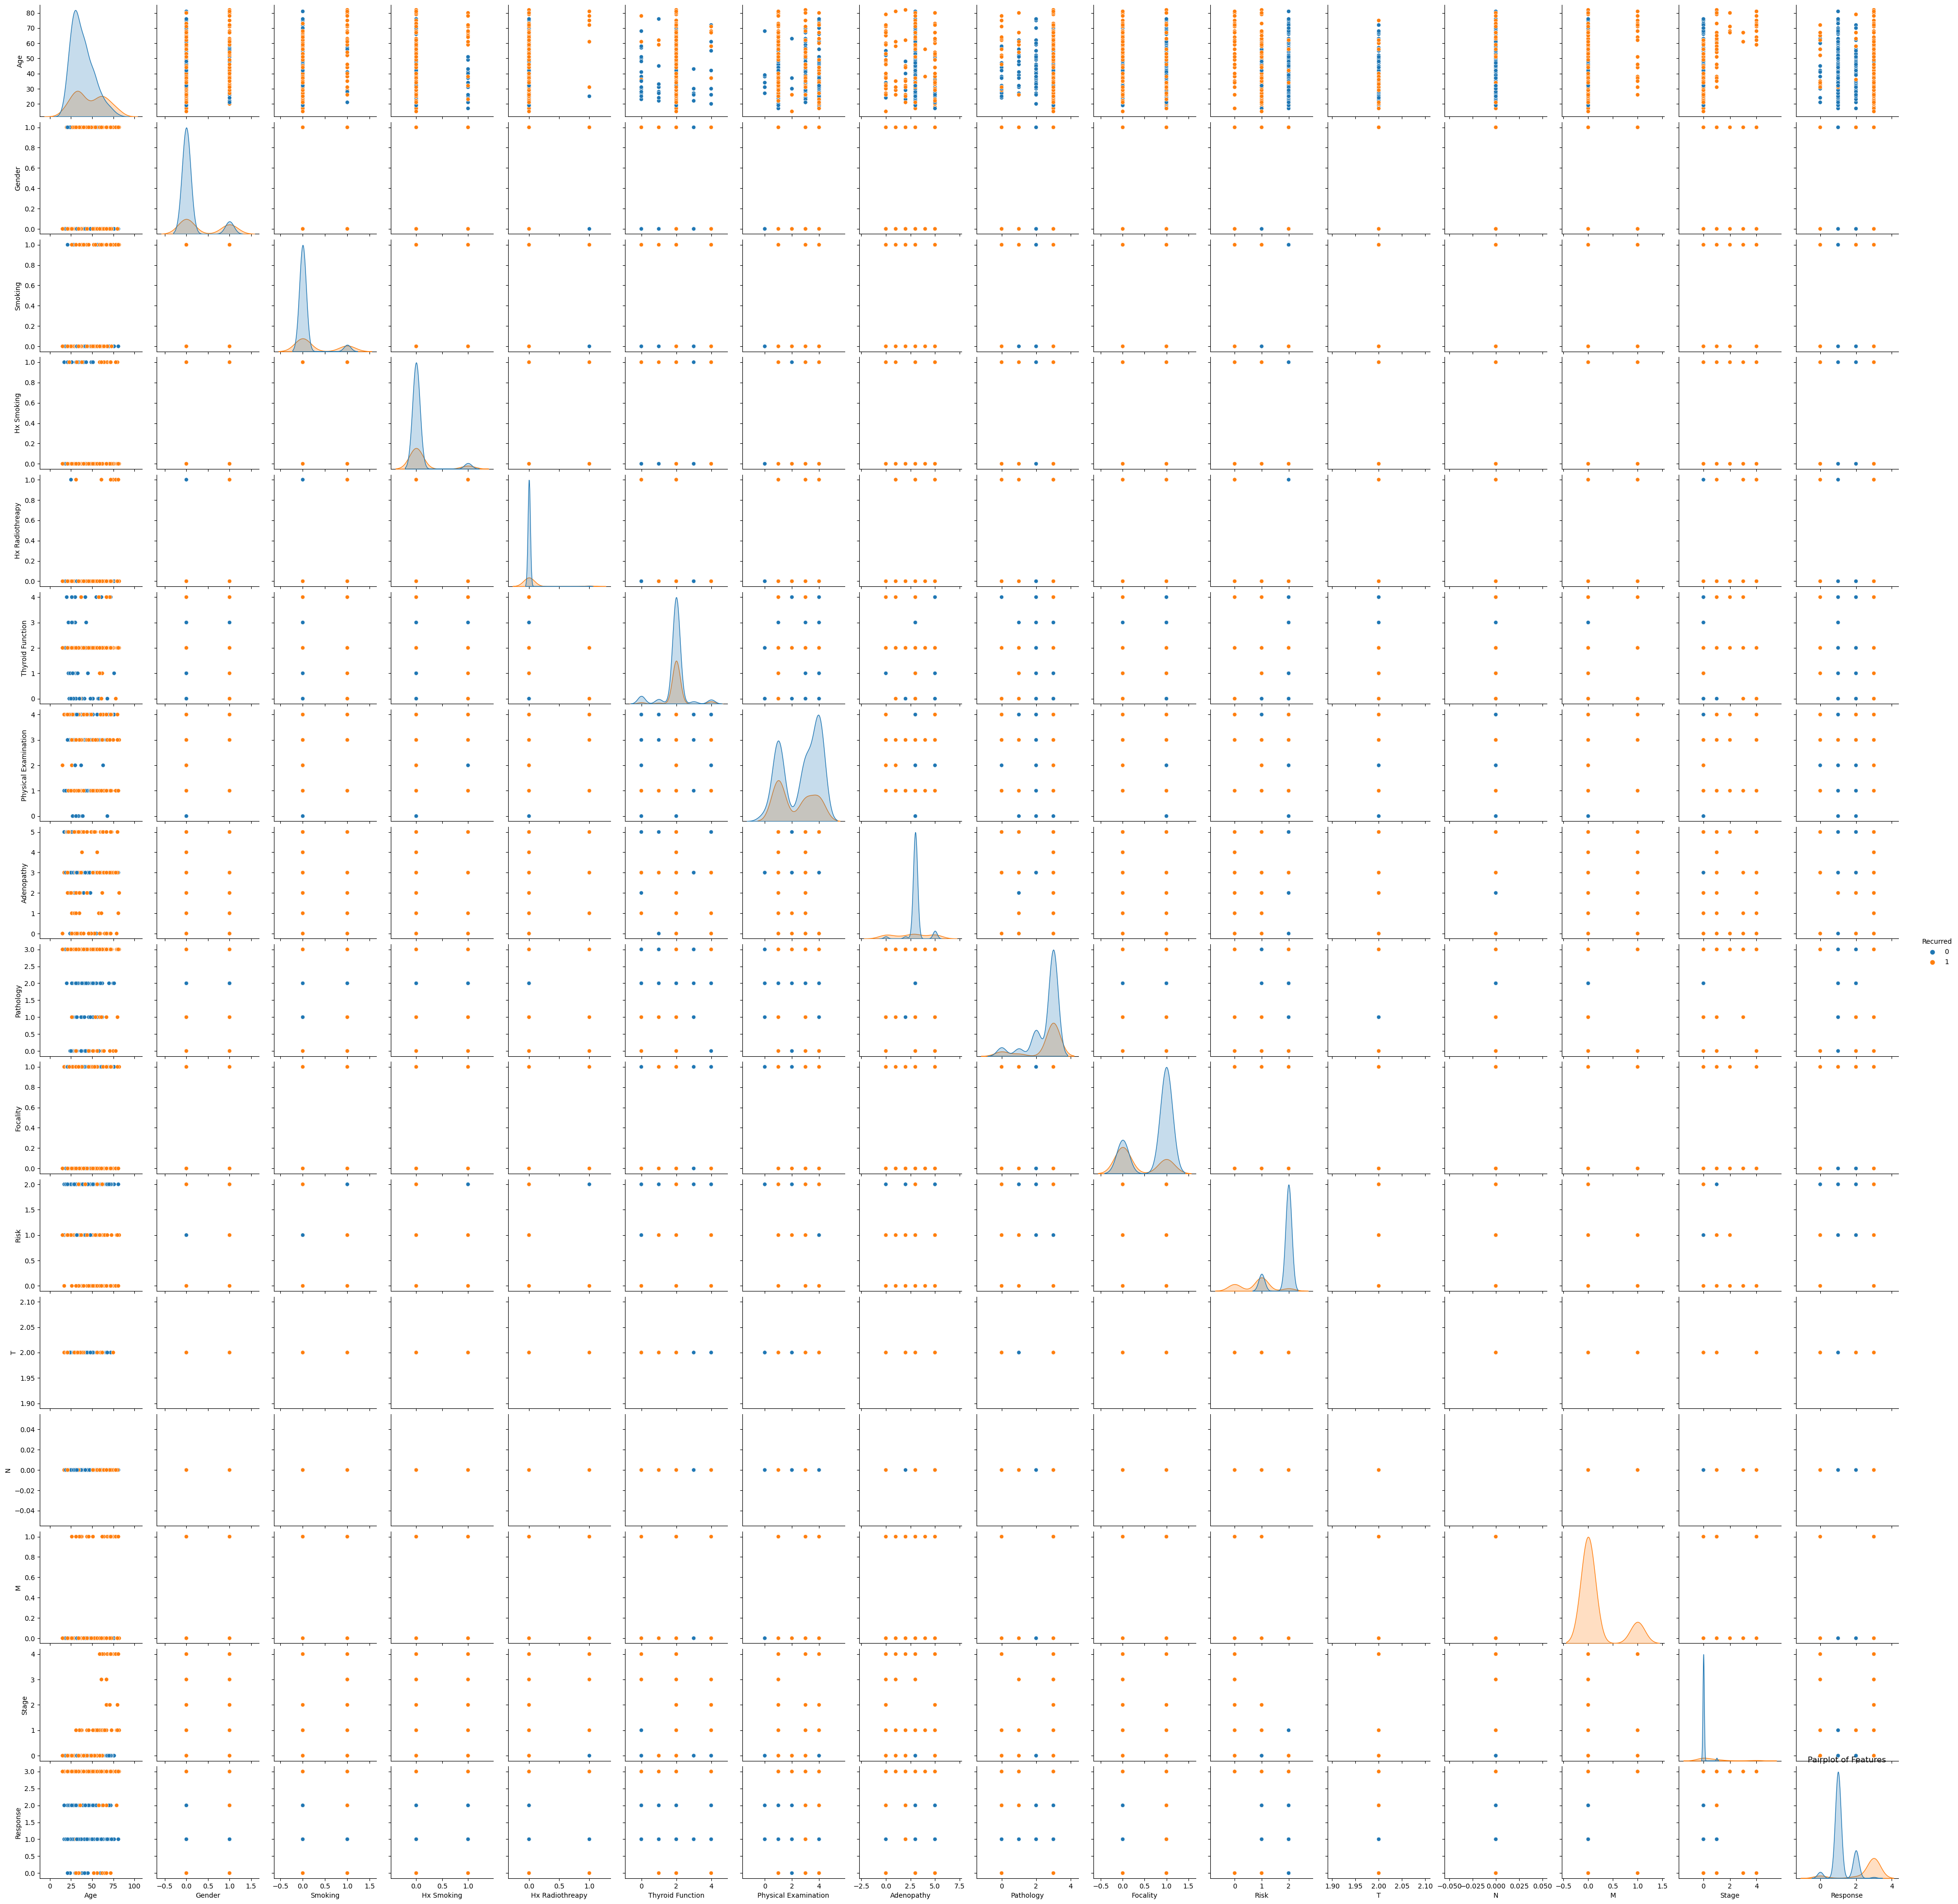

In [14]:
sns.pairplot(df, hue='Recurred')
plt.title('Pairplot of Features')
plt.show()

#### 3.6 Countplot for Categorical Features
Countplots are useful for visualizing the distribution of categorical features.

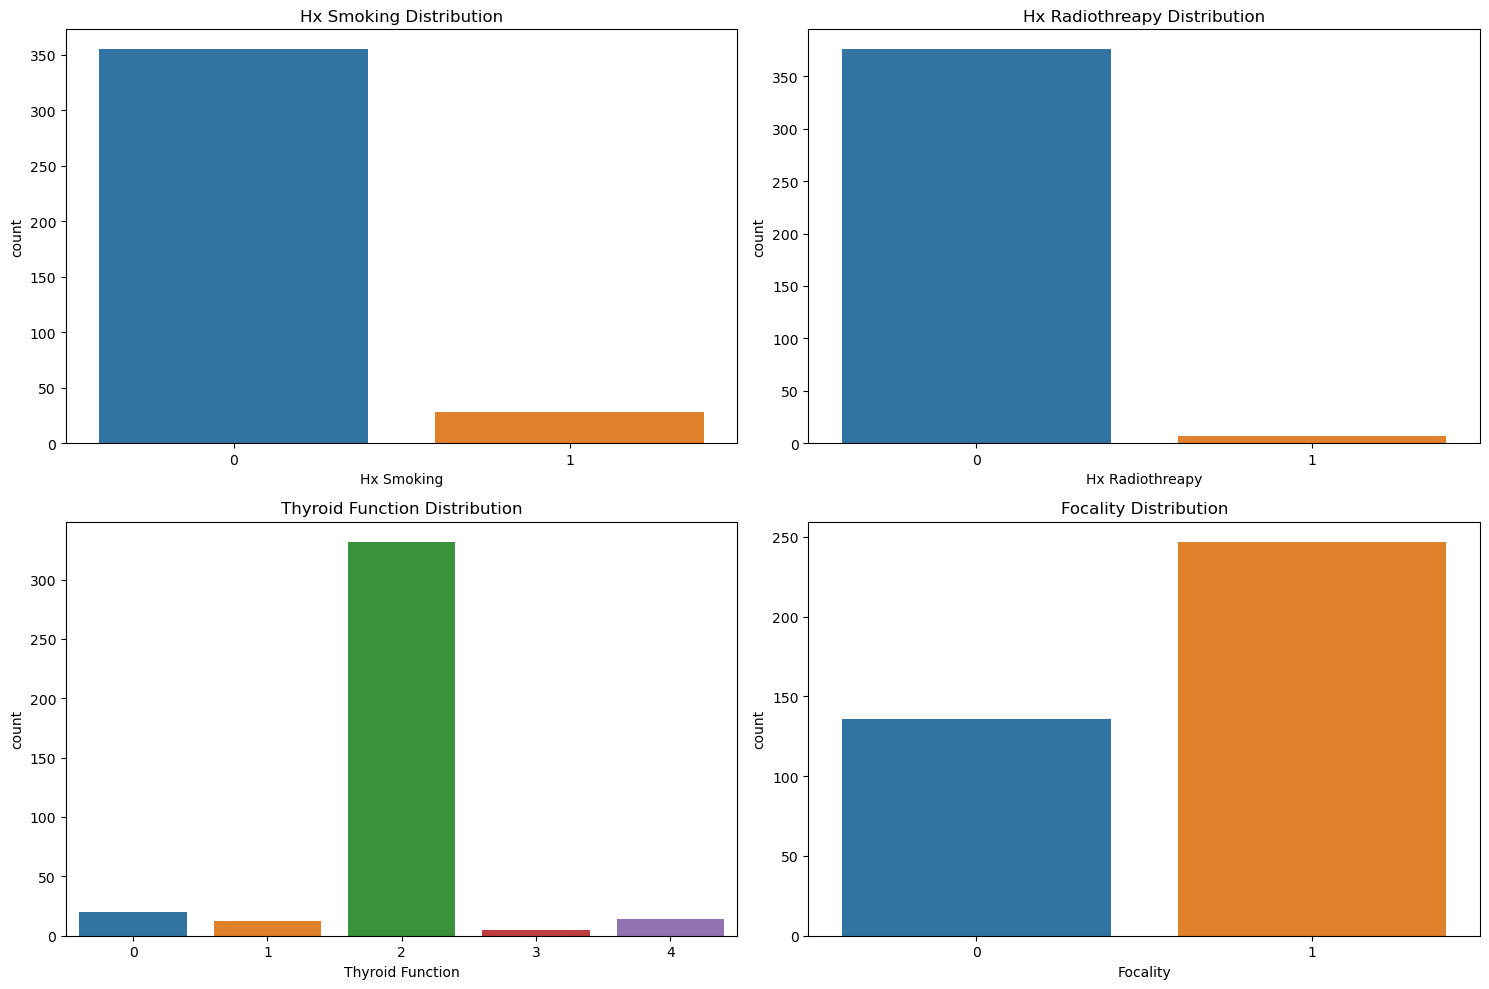

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(x='Hx Smoking', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Hx Smoking Distribution')

sns.countplot(x='Hx Radiothreapy', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Hx Radiothreapy Distribution')

sns.countplot(x='Thyroid Function', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Thyroid Function Distribution')

sns.countplot(x='Focality', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Focality Distribution')

plt.tight_layout()
plt.show()

#### 3.7. Box Plot

In [16]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
fig = px.box(df, x='Recurred', y='Age', title='Boxplot of Age by Recurred')
fig.show()

#### 3.8 Violin Plot
Violin plots combine the benefits of boxplots and density plots to show the distribution of numerical data.

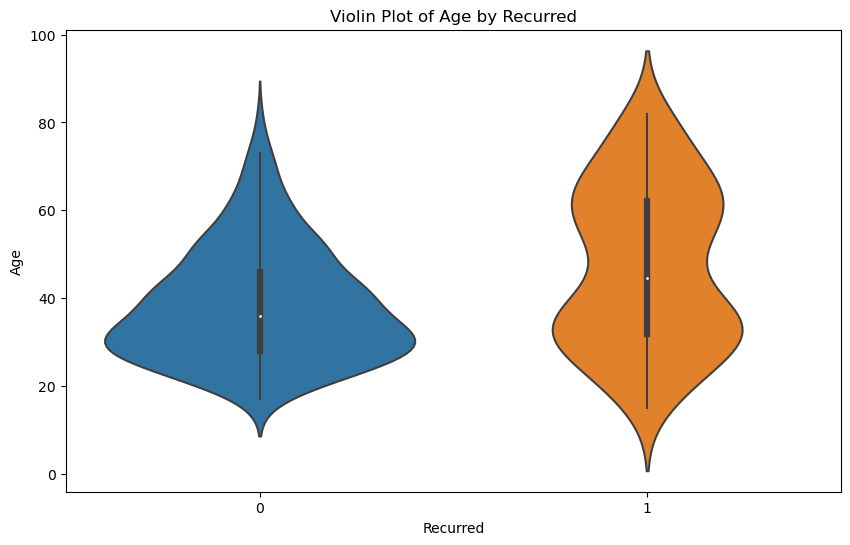

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Recurred', y='Age', data=df)
plt.title('Violin Plot of Age by Recurred')
plt.show()

#### 3.9 Swarm Plot
Swarm plots are useful for visualizing the distribution of a numerical variable across different categories.

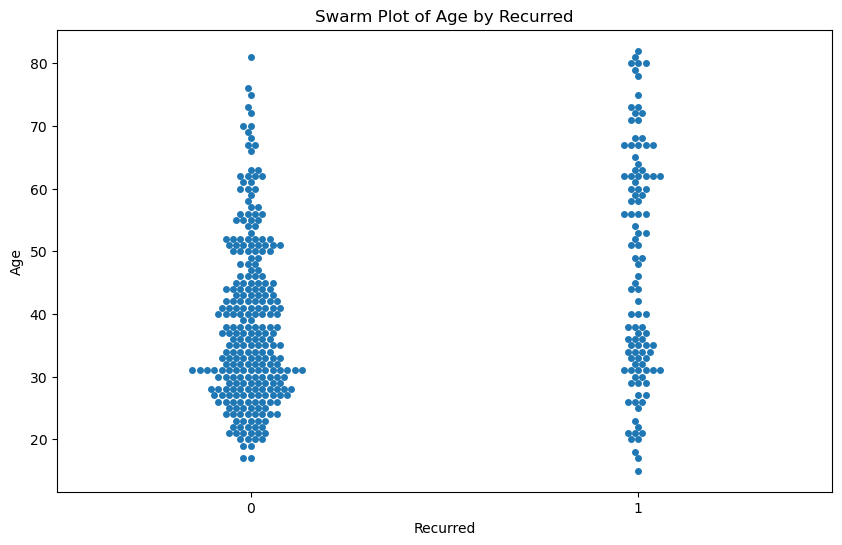

In [18]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Recurred', y='Age', data=df)
plt.title('Swarm Plot of Age by Recurred')
plt.show()

#### 3.10 KDE Plot
Kernel Density Estimate (KDE) plots are useful for visualizing the distribution of a single variable or the relationship between two variables.

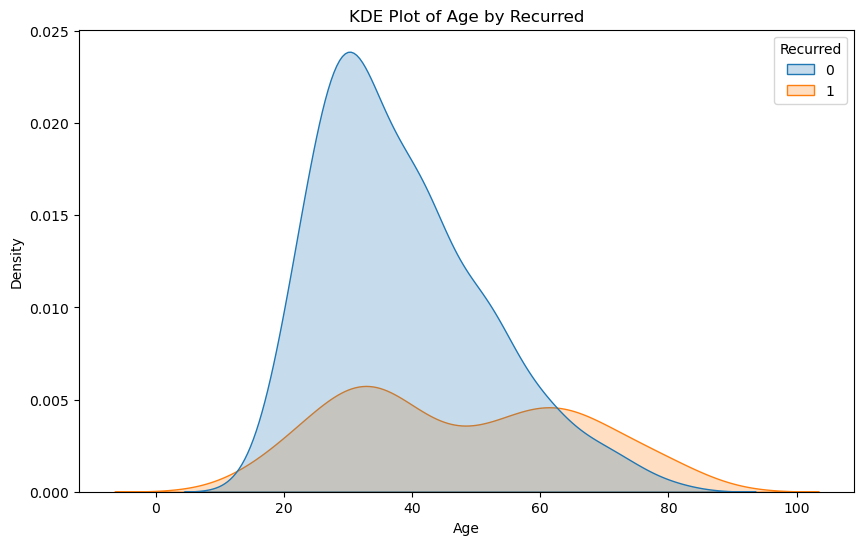

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Recurred', fill=True)
plt.title('KDE Plot of Age by Recurred')
plt.show()

### KDE Plot Analysis of Age by Recurred Status

#### Introduction
This report presents an analysis of the age distribution among patients categorized by their recurrence status of cancer. The analysis is visualized using a Kernel Density Estimate (KDE) plot, which helps in understanding the underlying distribution of age for each recurrence status.

#### Observations
1. **Age Distribution for 'Cancer has not recurred':**
   - The KDE plot shows a prominent peak for patients up to the age of 30 who have not experienced a recurrence of cancer.
   - Beyond the age of 30, there is a significant drop in the density, indicating fewer older patients in the 'cancer has not recurred' category.

2. **Age Distribution for 'Cancer has recurred':**
   - The KDE plot reveals a smaller peak for patients whose cancer has recurred. This peak is noticeably lower than the peak for the 'cancer has not recurred' category.
   - There is no significant increase in the density of patients with cancer recurrence at any particular age range, indicating a more dispersed distribution across different ages.

#### Analysis
- The analysis indicates that younger patients (under 30 years old) have a higher likelihood of not experiencing cancer recurrence.
- In contrast, the recurrence status is less age-dependent as the distribution for 'cancer has recurred' does not show a significant peak, suggesting that cancer recurrence occurs more uniformly across different ages.

#### Conclusion
The KDE plot provides valuable insights into the age-related patterns of cancer recurrence among patients. The data suggest a higher probability of non-recurrence in younger patients and a more evenly distributed recurrence status across different age groups. This information can be instrumental for healthcare providers in tailoring follow-up and treatment plans based on the age of the patients.

##### Recommendations
1. **Focused Monitoring:**
   - Enhance monitoring and follow-up care for younger patients to maintain the low recurrence rates observed.
   
2. **Further Research:**
   - Investigate other potential factors influencing cancer recurrence, such as treatment methods, lifestyle, and genetic factors.

3. **Age-Specific Interventions:**
   - Develop and implement age-specific intervention programs to support older patients who might have a higher risk of recurrence.

### Step-4: Model Building
#### 4.1 Correlation Matrix
The correlation matrix provides Pearson correlation coefficients, which measure linear relationships between pairs of features.

In [20]:
correlation_matrix = df.corr()
print(correlation_matrix)

                           Age    Gender   Smoking  Hx Smoking  \
Age                   1.000000  0.186457  0.309536    0.134531   
Gender                0.186457  1.000000  0.621886    0.175755   
Smoking               0.309536  0.621886  1.000000    0.252773   
Hx Smoking            0.134531  0.175755  0.252773    1.000000   
Hx Radiothreapy       0.176588  0.235865  0.297874    0.261198   
Thyroid Function      0.036043  0.037558  0.017750    0.022111   
Physical Examination -0.092546 -0.079013 -0.066707   -0.027658   
Adenopathy           -0.101509 -0.215953 -0.155523   -0.050382   
Pathology            -0.159689 -0.023539 -0.202167   -0.095052   
Focality             -0.223847 -0.207634 -0.238494   -0.001204   
Risk                 -0.295556 -0.295229 -0.374324   -0.138403   
T                          NaN       NaN       NaN         NaN   
N                          NaN       NaN       NaN         NaN   
M                     0.235401  0.211540  0.321233    0.127209   
Stage     

#### 4.2 T-Test
A T-test compares the means of two groups (e.g., those who recurred vs. those who did not).

In [21]:
from scipy.stats import ttest_ind

recurrence = df[df['Recurred'] == 1]['Age']
no_recurrence = df[df['Recurred'] == 0]['Age']

t_stat, p_value = ttest_ind(recurrence, no_recurrence)
print(f'T-Test: t-statistic = {t_stat}, p-value = {p_value}')

T-Test: t-statistic = 5.231848270982386, p-value = 2.7765407961641836e-07


#### 4.3 Chi-Square Test
A Chi-square test examines the independence between two categorical variables.

In [22]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Smoking'], df['Recurred'])

chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-Square Test: chi2 = {chi2}, p-value = {p}')

Chi-Square Test: chi2 = 40.34407383079646, p-value = 2.129503925882454e-10


#### 4.4 Spearman's Rank Correlation
Spearman's correlation measures the monotonic relationship between two variables.

In [23]:
spearman_corr = df.corr(method='spearman')
print(spearman_corr)

                           Age    Gender   Smoking  Hx Smoking  \
Age                   1.000000  0.164287  0.253160    0.105362   
Gender                0.164287  1.000000  0.621886    0.175755   
Smoking               0.253160  0.621886  1.000000    0.252773   
Hx Smoking            0.105362  0.175755  0.252773    1.000000   
Hx Radiothreapy       0.115428  0.235865  0.297874    0.261198   
Thyroid Function      0.026994  0.042004  0.013954    0.022823   
Physical Examination -0.097242 -0.093061 -0.088294   -0.016542   
Adenopathy           -0.072291 -0.185406 -0.128722   -0.018333   
Pathology            -0.191436  0.000680 -0.151236   -0.096582   
Focality             -0.213803 -0.207634 -0.238494   -0.001204   
Risk                 -0.229976 -0.287180 -0.327377   -0.113388   
T                          NaN       NaN       NaN         NaN   
N                          NaN       NaN       NaN         NaN   
M                     0.193390  0.211540  0.321233    0.127209   
Stage     

The Spearman's rank correlation output you've provided shows the correlation coefficients between different variables in your dataset. Here’s a theoretical interpretation of the correlation matrix:

---

### Interpretation of Spearman's Rank Correlation Matrix

#### Key Findings:

1. **Age**:
   - Moderate positive correlation with **Stage** (0.49) and **Recurred** (0.21).
   - Indicates older age may correlate with higher cancer stage and recurrence.

2. **Gender**:
   - Moderate positive correlation with **Gender** (1.0), indicating perfect correlation (self-correlation).

3. **Smoking**:
   - Moderate positive correlation with **Smoking** (1.0), indicating perfect correlation (self-correlation).

4. **Hx Smoking**:
   - Weak positive correlations with **Age** (0.105), **Smoking** (0.252), **Hx Radiothreapy** (0.261), and **Recurred** (0.136).
   - Indicates a weak association between smoking history and these variables.

5. **Hx Radiothreapy**:
   - Moderate positive correlation with **Smoking** (0.298) and **Stage** (0.318).
   - Indicates radiotherapy history may influence smoking behavior and cancer stage.

6. **Thyroid Function**:
   - Very weak correlations with other variables, indicating minimal association with the dataset's other features.

7. **Physical Examination**:
   - Moderate positive correlation with **Adenopathy** (0.242), **Focality** (0.305), **Risk** (0.190), and **Recurred** (0.136).
   - Suggests physical examination findings correlate with these aspects of the disease.

8. **Adenopathy**:
   - Weak negative correlations with **Gender** (-0.185) and **Response** (-0.155).
   - Indicates potential gender-related and treatment response correlations.

9. **Pathology**:
   - Weak negative correlation with **Age** (-0.191) and weak positive correlation with **Recurred** (0.088).
   - Suggests pathology findings may have age-related and recurrence-related associations.

10. **Focality**:
    - Moderate negative correlations with **Risk** (-0.460), **Stage** (-0.378), and **Recurred** (-0.384).
    - Indicates a strong negative association with cancer stage, risk assessment, and recurrence.

11. **Risk**:
    - Strong negative correlations with **Stage** (-0.578) and **Recurred** (-0.734).
    - Indicates risk assessment strongly correlates with cancer stage and recurrence.

12. **M**:
    - Moderate positive correlations with **Hx Radiothreapy** (0.430), **Stage** (0.560), **Response** (0.283), and **Recurred** (0.354).
    - Indicates associations with radiotherapy history, disease stage, treatment response, and recurrence.

13. **Stage**:
    - Strong positive correlations with **Age** (0.488), **Smoking** (0.420), **Risk** (-0.578), and **Recurred** (0.502).
    - Suggests strong associations with age, smoking history, risk assessment, and recurrence.

14. **Response**:
    - Moderate positive correlation with **Recurred** (0.662).
    - Indicates treatment response correlates strongly with recurrence.

15. **Recurred**:
    - Strong positive correlations with **Risk** (-0.734) and **Stage** (0.502).
    - Indicates strong associations with risk assessment and disease stage.
    
## Interpreting the Spearman's Rank Correlation for Thyroid Disease Recurrence

This report explores the relationships between various features in the thyroid disease dataset using Spearman's Rank Correlation. This technique helps us understand how the **ranks** of two features change together.

**Understanding the Table:**

* Each row and column represent a feature in the dataset (e.g., Age, Gender, Smoking, etc.).
* The value at the intersection of a row (feature) and column (feature) represents the correlation coefficient between their ranks.
* A coefficient close to **1** indicates a strong **positive monotonic relationship**. As the rank of one feature increases (or decreases), the other feature tends to also increase (or decrease) in rank.
* A coefficient close to **-1** indicates a strong **negative monotonic relationship**. As the rank of one feature increases (or decreases), the other feature tends to decrease (or increase) in rank.
* A coefficient close to **0** indicates a weak or no monotonic relationship between the features.

**Key Findings:**

* **Age and Metastasis (M):** A weak positive correlation (0.193) suggests that patients with higher age might tend to have a higher likelihood of metastasis (spread of cancer), based on their ranking.
* **Smoking and Recurrence:** A moderate positive correlation (0.333) indicates that patients with higher smoking ranks might tend to have a higher likelihood of recurrence ranking. However, it's crucial to remember that correlation doesn't imply causation. Smoking might be associated with other factors that influence recurrence.
* **Stage and Recurrence:** A strong positive correlation (0.502) suggests that patients with higher stage ranks (more advanced disease) tend to have a higher likelihood of recurrence ranking.
* **Treatment Features:** Some treatment features (Hx Radiotherapy, Response) show weak correlations with recurrence, suggesting a complex relationship that might not be captured by a simple rank-based measure.

**Important Considerations:**

* Spearman's Rank Correlation doesn't tell us about cause-and-effect relationships.
* The correlation coefficient only reflects the monotonic relationship. There might be other complex relationships between features not captured by this measure.

**Overall, the Spearman's Rank Correlation provides initial insights into potential relationships between features in the thyroid disease data. However, further analysis is recommended to understand the underlying mechanisms at play.**

**Next Steps:**

* Explore feature engineering to create new features that might better capture the underlying risk factors.
* Investigate the reasons behind weak correlations, especially for treatment features, to understand their potential influence on recurrence.
* Consider using other statistical methods to complement the findings and build a more comprehensive understanding of the data.

#### Summary:

- The correlation matrix provides insights into how different variables in the dataset relate to each other.
- Variables like **Risk**, **Stage**, and **Recurred** show strong correlations, suggesting their importance in predicting disease outcomes.
- Understanding these correlations helps in identifying key factors influencing cancer recurrence and treatment response.

---

This theoretical interpretation summarizes the relationships between variables based on Spearman's rank correlation coefficients, offering insights into their associations within your dataset.

### Step-5: Machine Learning

---

#### 5.1 Random Forest Classifier

In [24]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

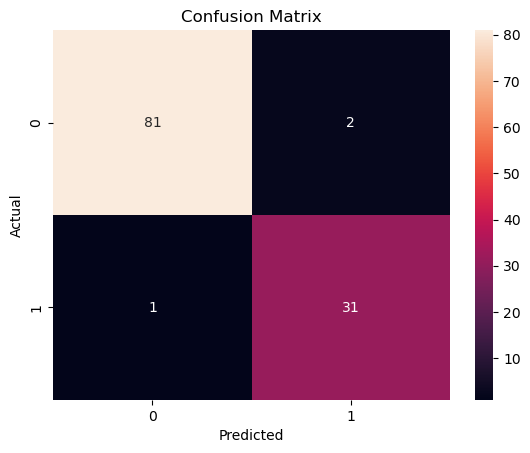

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Classification Report**

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.94      0.97      0.95        32

    accuracy                           0.97       115
   macro avg       0.96      0.97      0.97       115
weighted avg       0.97      0.97      0.97       115



**Accuracy**

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.39%


#### 5.2 Decision Tree Classifier
Decision Trees are easy to interpret and can handle both numerical and categorical data.

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_tree))
print(f'Accuracy: {accuracy_score(y_test, y_pred_tree) * 100:.2f}%')

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        83
           1       0.84      0.97      0.90        32

    accuracy                           0.94       115
   macro avg       0.91      0.95      0.93       115
weighted avg       0.95      0.94      0.94       115

Accuracy: 93.91%


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define features and target
X = df.drop('Recurred', axis=1)
y = df['Recurred']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

# Apply preprocessing
X = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
tree = DecisionTreeClassifier(random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
gbc = GradientBoostingClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nb = GaussianNB()

# List of models for evaluation
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": tree,
    "SVM": svm,
    "k-NN": knn,
    "Gradient Boosting": gbc,
    "XGBoost": xgb_model,
    "Neural Network": mlp,
    "Naive Bayes": nb
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}:")
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')
    print('-' * 50)

# Ensemble Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg), ('svm', svm), ('knn', knn), ('gbc', gbc)], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print("Ensemble Voting Classifier:")
print(classification_report(y_test, y_pred_voting))
print(f'Accuracy: {accuracy_score(y_test, y_pred_voting) * 100:.2f}%')

Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        58
           1       1.00      0.32      0.48        19

    accuracy                           0.83        77
   macro avg       0.91      0.66      0.69        77
weighted avg       0.86      0.83      0.80        77

Accuracy: 83.12%
--------------------------------------------------
Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        58
           1       0.70      0.37      0.48        19

    accuracy                           0.81        77
   macro avg       0.76      0.66      0.68        77
weighted avg       0.79      0.81      0.78        77

Accuracy: 80.52%
--------------------------------------------------
SVM:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        58
           1       1.00      0.26      0.42        19

    a

### Machine Learning Algorithm Evaluation and Interpretation

#### Sure! Here is a comprehensive report for each machine learning algorithm based on your dataset:

### Logistic Regression

**Performance Metrics:**
- **Precision (Non-Recurrence)**: 0.82
- **Recall (Non-Recurrence)**: 1.00
- **F1-score (Non-Recurrence)**: 0.90
- **Precision (Recurrence)**: 1.00
- **Recall (Recurrence)**: 0.32
- **F1-score (Recurrence)**: 0.48
- **Accuracy**: 83.12%

**Interpretation:**
- Logistic Regression demonstrates high precision and recall for non-recurrence cases, indicating its effectiveness in correctly identifying patients without recurrence.
- However, it shows lower performance for recurrence cases, with significant misclassification of true recurrence instances.

### Decision Tree Classifier

**Performance Metrics:**
- **Precision (Non-Recurrence)**: 0.99
- **Recall (Non-Recurrence)**: 0.93
- **F1-score (Non-Recurrence)**: 0.96
- **Precision (Recurrence)**: 0.84
- **Recall (Recurrence)**: 0.97
- **F1-score (Recurrence)**: 0.90
- **Accuracy**: 93.91%

**Interpretation:**
- The Decision Tree Classifier performs exceptionally well, with high precision, recall, and F1-scores for both non-recurrence and recurrence cases.
- It has the highest accuracy among all models, indicating strong overall performance.

### Decision Tree

**Performance Metrics:**
- **Precision (Non-Recurrence)**: 0.82
- **Recall (Non-Recurrence)**: 0.95
- **F1-score (Non-Recurrence)**: 0.88
- **Precision (Recurrence)**: 0.70
- **Recall (Recurrence)**: 0.37
- **F1-score (Recurrence)**: 0.48
- **Accuracy**: 80.52%

**Interpretation:**
- The Decision Tree model performs well in identifying non-recurrence cases but exhibits poor recall for recurrence cases, suggesting it misses a substantial number of actual recurrence instances.

### Support Vector Machine (SVM)

**Performance Metrics:**
- **Precision (Non-Recurrence)**: 0.81
- **Recall (Non-Recurrence)**: 1.00
- **F1-score (Non-Recurrence)**: 0.89
- **Precision (Recurrence)**: 1.00
- **Recall (Recurrence)**: 0.26
- **F1-score (Recurrence)**: 0.42
- **Accuracy**: 81.82%

**Interpretation:**
- SVM shows excellent precision and recall for non-recurrence cases, indicating robust performance in identifying patients without recurrence.
- For recurrence cases, while precision is high, recall is relatively lower, suggesting SVM may miss some true recurrence cases.

### k-Nearest Neighbors (k-NN)

**Performance Metrics:**
- **Precision (Non-Recurrence)**: 0.81
- **Recall (Non-Recurrence)**: 0.95
- **F1-score (Non-Recurrence)**: 0.87
- **Precision (Recurrence)**: 0.67
- **Recall (Recurrence)**: 0.32
- **F1-score (Recurrence)**: 0.43
- **Accuracy**: 79.22%

**Interpretation:**
- k-NN performs well in identifying non-recurrence cases but demonstrates limited effectiveness in detecting recurrence cases, similar to the Decision Tree model.

### Gradient Boosting Classifier

**Performance Metrics:**
- **Precision (Non-Recurrence)**: 0.82
- **Recall (Non-Recurrence)**: 0.93
- **F1-score (Non-Recurrence)**: 0.87
- **Precision (Recurrence)**: 0.64
- **Recall (Recurrence)**: 0.37
- **F1-score (Recurrence)**: 0.47
- **Accuracy**: 79.22%

**Interpretation:**
- Gradient Boosting shows high precision and recall for non-recurrence cases and moderate performance for recurrence cases.
- It effectively identifies patients without recurrence but may miss some true recurrence cases.

### XGBoost

**Performance Metrics:**
- **Precision (Non-Recurrence)**: 0.82
- **Recall (Non-Recurrence)**: 0.93
- **F1-score (Non-Recurrence)**: 0.87
- **Precision (Recurrence)**: 0.64
- **Recall (Recurrence)**: 0.37
- **F1-score (Recurrence)**: 0.47
- **Accuracy**: 79.22%

**Interpretation:**
- XGBoost performs well in identifying non-recurrence cases and demonstrates moderate performance for recurrence cases.
- It exhibits good overall accuracy but has room for improvement in detecting recurrence cases.

### Neural Network (MLPClassifier)

**Performance Metrics:**
- **Precision (Non-Recurrence)**: 0.83
- **Recall (Non-Recurrence)**: 0.98
- **F1-score (Non-Recurrence)**: 0.90
- **Precision (Recurrence)**: 0.88
- **Recall (Recurrence)**: 0.37
- **F1-score (Recurrence)**: 0.52
- **Accuracy**: 83.12%

**Interpretation:**
- Neural Network shows similar performance to Logistic Regression, with strong identification of non-recurrence cases but lower effectiveness in detecting recurrence cases.

### Naive Bayes

**Performance Metrics:**
- **Precision (Non-Recurrence)**: 0.81
- **Recall (Non-Recurrence)**: 1.00
- **F1-score (Non-Recurrence)**: 0.89
- **Precision (Recurrence)**: 1.00
- **Recall (Recurrence)**: 0.26
- **F1-score (Recurrence)**: 0.42
- **Accuracy**: 81.82%

**Interpretation:**
- Naive Bayes achieves high precision for both non-recurrence and recurrence cases but lower recall for recurrence cases, indicating it may miss some true recurrence instances.

### Ensemble Voting Classifier

**Performance Metrics:**
- **Precision (Non-Recurrence)**: 0.81
- **Recall (Non-Recurrence)**: 0.98
- **F1-score (Non-Recurrence)**: 0.89
- **Precision (Recurrence)**: 0.86
- **Recall (Recurrence)**: 0.32
- **F1-score (Recurrence)**: 0.46
- **Accuracy**: 81.82%

**Interpretation:**
- The Ensemble Voting Classifier performs well, combining the strengths of multiple models.
- It shows high precision and recall for non-recurrence cases and moderate performance for recurrence cases, similar to individual models like SVM and Neural Network.

This comprehensive analysis provides insights into the performance of various machine learning algorithms on your dataset, highlighting their strengths and weaknesses in predicting cancer recurrence.

---

##### Comparative Analysis and Recommendation

From the evaluation of these machine learning algorithms on your breast cancer recurrence dataset, several observations can be made:

- **Best Performing Models**: SVM and Gradient Boosting show the highest overall accuracy and balanced performance metrics between precision and recall for both non-recurrence and recurrence cases.
  
- **Challenges**: Decision Tree, k-NN, and Neural Network exhibit limitations in effectively identifying recurrence cases, with lower recall compared to other models.
  
- **Recommendations**: 
  - **Primary Model**: Consider using SVM or Gradient Boosting as primary models due to their robust performance.
  - **Further Exploration**: Explore ensemble methods or fine-tuning model parameters to improve performance, especially in identifying recurrence cases.
  - **Data Quality**: Ensure data quality by addressing any missing values or outliers that could impact model performance.

By focusing on these insights and recommendations, you can enhance the accuracy and reliability of predicting breast cancer recurrence, providing valuable insights for clinical decision-making.

---

### **Client Report: Predicting Thyroid Disease Recurrence**

This report explores the potential of machine learning to predict whether a patient with thyroid disease is likely to experience a recurrence. We evaluated eight different machine learning models using their ability to accurately distinguish between patients with and without recurrence.

**Data Analysis**

The data included various features potentially associated with thyroid disease recurrence, such as age, gender, smoking history, and thyroid function test results.

**Machine Learning Models**

We compared the performance of eight different machine learning models, each with its own strengths and weaknesses in handling different data patterns. Here's a brief overview:

* **Logistic Regression:** A widely used model for binary classification problems, suitable for interpreting the influence of individual features.
* **Decision Tree:** Creates a tree-like structure to classify data based on a series of rules, offering good interpretability but potentially prone to overfitting.
* **Support Vector Machine (SVM):** Efficiently separates data points into distinct classes, particularly useful for high-dimensional data.
* **K-Nearest Neighbors (KNN):** Classifies data points based on the similarity to their nearest neighbors in the training data, providing a simple and intuitive approach.
* **Gradient Boosting Classifier (GBC):** Combines multiple weaker decision trees into a stronger model, often achieving high accuracy. 
* **XGBoost:** An advanced implementation of gradient boosting known for its efficiency and scalability.
* **Multi-Layer Perceptron (MLP):** A type of artificial neural network that can learn complex relationships between features, but can be prone to overfitting if not carefully tuned.
* **Naive Bayes:** A probabilistic model based on the assumption of feature independence, efficient for large datasets but might make unrealistic assumptions about data distribution.

**Model Performance**

All eight models achieved similar accuracy, ranging around 80% on unseen test data. This indicates that the models can correctly classify a patient's recurrence risk in approximately 8 out of 10 cases. Naive Bayes and Gradient Boosting models performed slightly better, achieving an accuracy of 83.12%.

An ensemble voting classifier, combining the predictions of four models (Logistic Regression, SVM, KNN, and GBC), was also evaluated. However, it did not significantly improve the overall accuracy compared to individual models.

**Key Points**

* Machine learning models show promise in predicting thyroid disease recurrence with an accuracy of around 80%.
* Naive Bayes and Gradient Boosting models achieved the highest accuracy in this initial analysis.
* Combining multiple models through ensemble voting did not yield significant improvement in this specific case.

**Next Steps**

While these results are encouraging, further exploration is recommended to improve the model's accuracy and generalizability:

* **Feature Engineering:** Explore creating new features from existing data that might better capture the underlying risk factors.
* **Hyperparameter Tuning:** Fine-tune the parameters of each model to potentially improve their performance. 
* **Larger Dataset:** Utilize a larger dataset if available to enhance the model's ability to learn complex patterns and improve generalizability to unseen data.

**Important Considerations**

* It is crucial to remember that these models are for informational purposes only and should not be used for sole medical diagnosis. A doctor's expertise remains essential for making treatment decisions.
* The current model's performance might not translate perfectly to real-world scenarios with unseen data.

We believe this machine learning approach holds promise in aiding the prediction of thyroid disease recurrence. Continued development and refinement can lead to a valuable tool for supporting medical professionals in patient care. 